<a href="https://colab.research.google.com/github/trilgar/MSM-2021/blob/main/MSM_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_epochs = 5 
num_classes = 10 
batch_size = 100 
learning_rate = 0.001
DATA_PATH ='/content/datasets'
MODEL_STORE_PATH ='/content/saveloads/'

In [ ]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]) 

train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True) 
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /content/datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /content/datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/datasets/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [ ]:
model = ConvNet()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/5], Step [100/600], Loss: 0.1981, Accuracy: 94.00%
Epoch [1/5], Step [200/600], Loss: 0.1363, Accuracy: 95.00%
Epoch [1/5], Step [300/600], Loss: 0.1451, Accuracy: 95.00%
Epoch [1/5], Step [400/600], Loss: 0.1084, Accuracy: 96.00%
Epoch [1/5], Step [500/600], Loss: 0.1279, Accuracy: 96.00%
Epoch [1/5], Step [600/600], Loss: 0.0455, Accuracy: 98.00%
Epoch [2/5], Step [100/600], Loss: 0.1036, Accuracy: 97.00%
Epoch [2/5], Step [200/600], Loss: 0.0461, Accuracy: 98.00%
Epoch [2/5], Step [300/600], Loss: 0.2014, Accuracy: 97.00%
Epoch [2/5], Step [400/600], Loss: 0.0555, Accuracy: 98.00%
Epoch [2/5], Step [500/600], Loss: 0.0883, Accuracy: 97.00%
Epoch [2/5], Step [600/600], Loss: 0.1300, Accuracy: 97.00%
Epoch [3/5], Step [100/600], Loss: 0.0162, Accuracy: 99.00%
Epoch [3/5], Step [200/600], Loss: 0.0651, Accuracy: 98.00%
Epoch [3/5], Step [300/600], Loss: 0.0581, Accuracy: 98.00%
Epoch [3/5], Step [400/600], Loss: 0.2734, Accuracy: 93.00%
Epoch [3/5], Step [500/600], Loss: 0.045

In [ ]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))


Test Accuracy of the model on the 10000 test images: 98.92 %


In [ ]:
torch.save(model.state_dict(),'conv_net_model.ckpt')

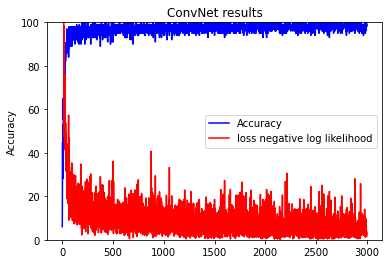

In [ ]:
plt.title('ConvNet results')
plt.ylabel("Accuracy")
plt.ylim((0, 100)) 
plt.plot(np.arange(len(loss_list)), np.array(acc_list)*100, color = "blue", label= 'Accuracy')
plt.plot(np.arange(len(loss_list)), np.array(loss_list)*100, color= 'red', label = 'loss negative log likelihood')
plt.legend()
plt.show()